<a href="https://colab.research.google.com/github/oceam/agri-image/blob/main/codes/Googlecolab_fundamentals_4_jp.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Googlecolab_fundamentals_4
Fundamentals of Read, process and save image.   
画像の読み取り、処理、保存の基礎。 

Wei Guo  
2022.08.26

# Acess the image data

The images that needed to be processed can be saved at:


1.   You local disk
2.   Third party cloud server
3.   You google driver



## Uploading files from your local disk to colab
You can upload your file from local disk by drag to "Files" or use command.
`files.upload` returns a dictionary of the files which were uploaded.
The dictionary is keyed by the file name and values are the data which were uploaded.

In [ ]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

It is not efficient for sure!

## Downloading files from thrid party could server to colab  
You can also download the files that saved at a cloud server.
e.g. google driver, dropbox, etc.


In [ ]:
# download file from dropbox

!wget https://www.dropbox.com/s/eoa5vtygc8til9p/soybean_s.zip


--2022-08-31 08:44:47--  https://www.dropbox.com/s/eoa5vtygc8til9p/soybean_s.zip
Resolving www.dropbox.com (www.dropbox.com)... 162.125.3.18, 2620:100:6016:18::a27d:112
Connecting to www.dropbox.com (www.dropbox.com)|162.125.3.18|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: /s/raw/eoa5vtygc8til9p/soybean_s.zip [following]
--2022-08-31 08:44:47--  https://www.dropbox.com/s/raw/eoa5vtygc8til9p/soybean_s.zip
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc706e08fefad4af2e7f715c61e2.dl.dropboxusercontent.com/cd/0/inline/BsCS6D-o3YKvrapgErGhoKcbBcW2tt46HzQavUZ4t5BqjA7xqWS_cGaevyxEErHFhYjDqOdE4E-zpNzOwvuCY9q9GD71IUHYIKAf4_Flo6g2o5KuT_zLM2YhEeluEAosFjjKBzjLsUlFIQXTjsS6pM0IzC5XwJrNwBEbUqVR2q4H0Q/file# [following]
--2022-08-31 08:44:47--  https://uc706e08fefad4af2e7f715c61e2.dl.dropboxusercontent.com/cd/0/inline/BsCS6D-o3YKvrapgErGhoKcbBcW2tt46HzQavUZ4t5BqjA7xqWS_cGaevyxEErHFhYjDqOdE4E-zp

In [ ]:
# download file from google drive
# file link: https://drive.google.com/file/d/14794wG4rU-7nKsNhH7WJBdyL9zLlfv-7/view?usp=sharing
# download link(when you click download): https://drive.google.com/u/1/uc?id=14794wG4rU-7nKsNhH7WJBdyL9zLlfv-7&export=download
# use id from download link
!gdown --id 14794wG4rU-7nKsNhH7WJBdyL9zLlfv-7

/usr/local/lib/python3.7/dist-packages/gdown/cli.py:131: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  category=FutureWarning,
Downloading...
From: https://drive.google.com/uc?id=14794wG4rU-7nKsNhH7WJBdyL9zLlfv-7
To: /content/soybean_s.zip
100% 23.2M/23.2M [00:00<00:00, 41.8MB/s]


In [ ]:
import gdown

# a file
url = "https://drive.google.com/u/1/uc?id=14794wG4rU-7nKsNhH7WJBdyL9zLlfv-7"
output1 = "soybean_s1.zip"
gdown.download(url, output1, quiet=False)

Downloading...
From: https://drive.google.com/u/1/uc?id=14794wG4rU-7nKsNhH7WJBdyL9zLlfv-7
To: /content/soybean_s1.zip
100%|██████████| 23.2M/23.2M [00:00<00:00, 177MB/s]


'soybean_s1.zip'

In [ ]:
# same as the above, but with the file ID
id = "14794wG4rU-7nKsNhH7WJBdyL9zLlfv-7"
output2= "soybean_s2.zip"
gdown.download(id=id, output=output2, quiet=False)

Downloading...
From: https://drive.google.com/uc?id=14794wG4rU-7nKsNhH7WJBdyL9zLlfv-7
To: /content/soybean_s2.zip
100%|██████████| 23.2M/23.2M [00:00<00:00, 233MB/s]


'soybean_s2.zip'

In [ ]:
# same as the above, and you can copy-and-paste a URL from Google Drive with fuzzy=True
url = "https://drive.google.com/file/d/14794wG4rU-7nKsNhH7WJBdyL9zLlfv-7/view?usp=sharing"
output3= "soybean_s3.zip"
gdown.download(url=url, output=output3, quiet=False, fuzzy=True)

Downloading...
From: https://drive.google.com/uc?id=14794wG4rU-7nKsNhH7WJBdyL9zLlfv-7
To: /content/soybean_s3.zip
100%|██████████| 23.2M/23.2M [00:00<00:00, 194MB/s]


'soybean_s3.zip'

In [ ]:
# lets see what we got from download
!unzip soybean_s3.zip  

Archive:  soybean_s3.zip
  inflating: soybean_s/C5_086.JPG    
  inflating: soybean_s/C5_096.JPG    
  inflating: soybean_s/C5_106.JPG    
  inflating: soybean_s/C5_116.JPG    
  inflating: soybean_s/C5_126.JPG    
  inflating: soybean_s/C5_136.JPG    


## Mount your google driver to colab  
You can access files in Drive in a number of ways, including:
- Mounting your Google Drive in the runtime's virtual machine
- Using a wrapper around the API such as [PyDrive](https://pythonhosted.org/PyDrive/)
- Using the [native REST API](https://developers.google.com/drive/v3/web/about-sdk)

**Mounting Google Drive locally**
The example below shows how to mount your Google Drive on your runtime using an authorization code, and how to write and read files there.  

This only supports reading, writing, and moving files; to programmatically modify sharing settings or other metadata, use one of the other options.  

**Note:** When using the 'Mount Drive' button in the file browser, no authentication codes are necessary for notebooks that have only been edited by the current user.

Google ドライブをローカルにマウントする

以下の例では、認証コードを使用してランタイム上に Google ドライブをマウントする方法と、そのドライブでファイルを読み書きする方法を示します。

この例では、ファイルの読み取り、書き込み、移動のみに対応しています。共有設定や他のメタデータをプログラムから変更するには、下記の他の方法を使用してください。

<strong>注:</strong> ファイル ブラウザで &#91;ドライブをマウント&#93; ボタンを使用する場合、現在のユーザーのみに編集されたノートブックについては認証コードは必要ありません。

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Process/preprocess the image data
lets try to process the images


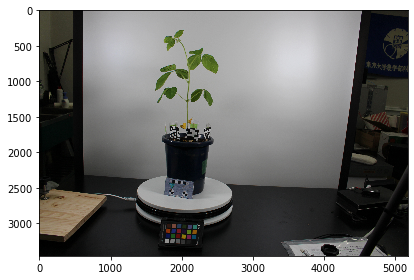

In [ ]:
# read and show one image 
from skimage import io
import os
imgname= os.path.join('soybean_s', 'C5_086.JPG')
I=io.imread(imgname)
io.imshow(I)

In [ ]:
# read and show multiple image 
imgfolder=r'soybean_s'
for image in os.listdir(imgfolder):
 print(image)

C5_086.JPG
C5_116.JPG
C5_096.JPG
C5_136.JPG
C5_126.JPG
C5_106.JPG


In [ ]:
# or use glob to get list of images
import glob
from skimage import io
img_list = glob.glob(r'soybean_s/*.JPG')
print(img_list)

['soybean_s/C5_086.JPG', 'soybean_s/C5_116.JPG', 'soybean_s/C5_096.JPG', 'soybean_s/C5_136.JPG', 'soybean_s/C5_126.JPG', 'soybean_s/C5_106.JPG']


The `io` module provides a method named imread_collection() which accepts a list of files to be read from disk or Unix style path matching pattern. It does not load all images immediately in memory but it reads image only when its called, till then it just maintains a list of image names as an array.

In [ ]:
img_list = io.imread_collection("soybean_s/*.JPG")
img_list.files

['soybean_s/C5_086.JPG',
 'soybean_s/C5_096.JPG',
 'soybean_s/C5_106.JPG',
 'soybean_s/C5_116.JPG',
 'soybean_s/C5_126.JPG',
 'soybean_s/C5_136.JPG']

In [ ]:
for idx, image in enumerate(img_list):
    print("Image %d Size : "%(idx+1), image.shape)

Image 1 Size :  (3456, 5184, 3)
Image 2 Size :  (3456, 5184, 3)
Image 3 Size :  (3456, 5184, 3)
Image 4 Size :  (3456, 5184, 3)
Image 5 Size :  (3456, 5184, 3)
Image 6 Size :  (3456, 5184, 3)


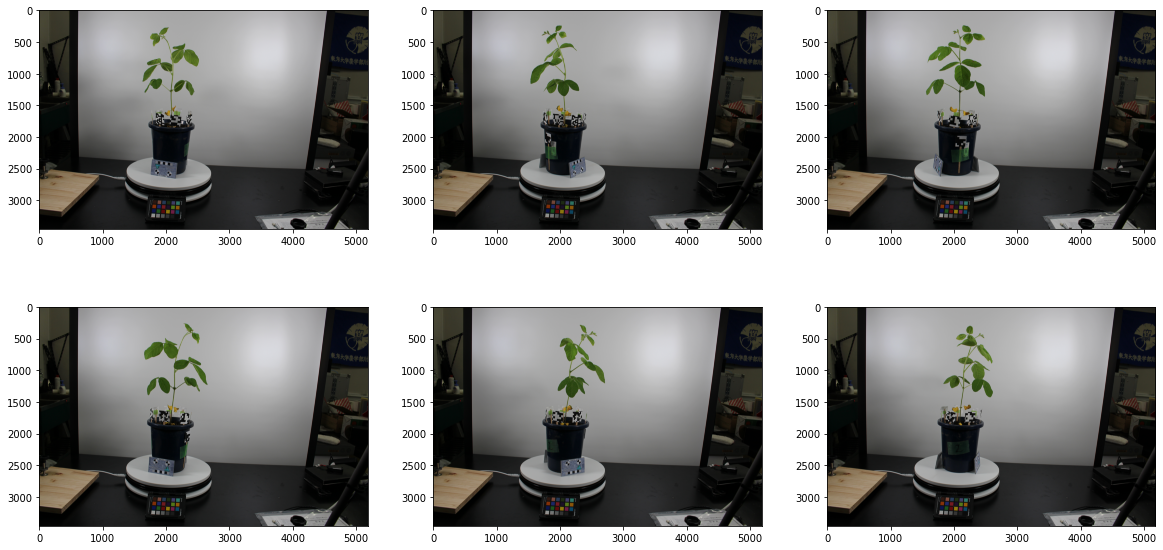

In [ ]:
# io.imshow_collection  to display multipy images respectively.
fig = io.imshow_collection(img_list);
fig.set_figwidth(20)
fig.set_figheight(10)

(1300, 1500, 3)

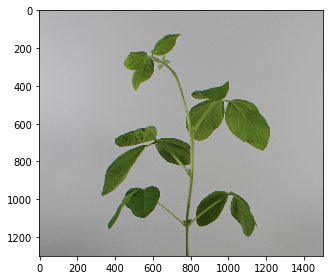

In [ ]:
from skimage.util import crop
# crop(img,length, width, rgb)
# インデックスで上から150〜下から(3456-1300-150)の区間が切り取られることになる。
im_crop=crop(I,((150,(3456-1300-150)),(1300,(5184-1500-1300)),(0,0)))
io.imshow(im_crop)
im_crop.shape

In [ ]:
savepath = 'soybean_s_c/'
# Check whether the specified path exists or not
isExist = os.path.exists(savepath)
if not isExist:
  # Create a new directory because it does not exist 
  os.makedirs(savepath)
  print('Created path for save')

Created path for save


In [ ]:
# Once all the paths are retrieved, read the images one by one in a loop.
from skimage.util import crop
im_crop_list = []
for imgname in img_list.files:
    im = io.imread(imgname)
    # crop(img,length, width, rgb)
    im_crop=crop(im,((150,(3456-1300-150)),(1300,(5184-1500-1300)),(0,0)))
    im_crop_list.append(im_crop)
    c_imgname=savepath+imgname[10:-4]+'_c.JPG'
    io.imsave(c_imgname,im_crop)

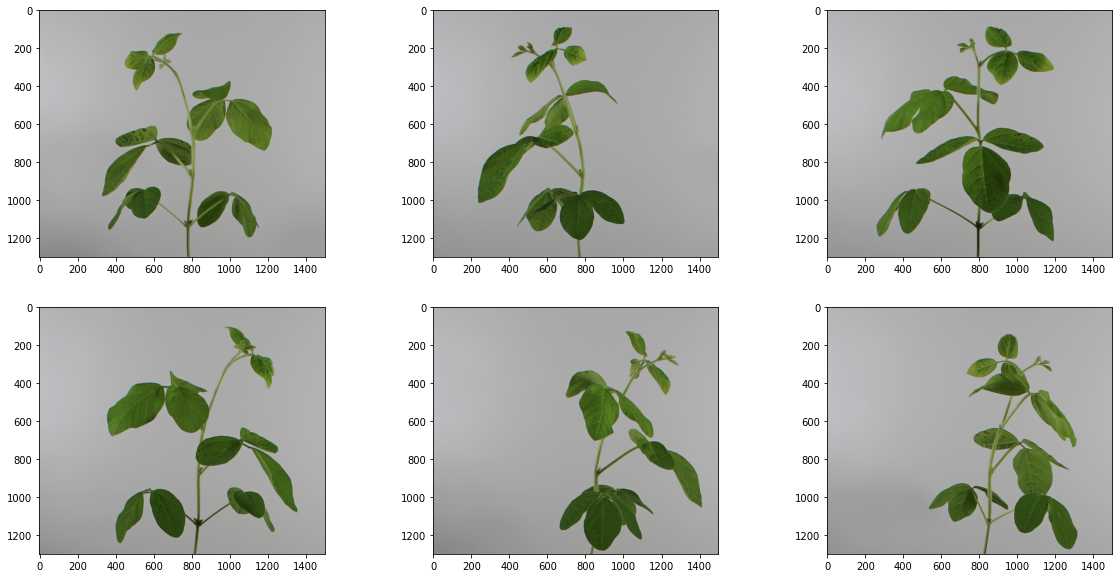

In [ ]:
fig = io.imshow_collection(im_crop_list);
fig.set_figwidth(20)
fig.set_figheight(10)

# Save the image data

Save the processed image data by:
1.   Download to local disk
2.   Save to mounted google drive



In [ ]:
!zip -r /content/soybean_s_c.zip /content/soybean_s_c 

  adding: content/soybean_s_c/ (stored 0%)
  adding: content/soybean_s_c/.ipynb_checkpoints/ (stored 0%)
  adding: content/soybean_s_c/C5_096_c.JPG (deflated 17%)
  adding: content/soybean_s_c/C5_086_c.JPG (deflated 16%)
  adding: content/soybean_s_c/C5_106_c.JPG (deflated 15%)
  adding: content/soybean_s_c/C5_126_c.JPG (deflated 18%)
  adding: content/soybean_s_c/C5_116_c.JPG (deflated 16%)
  adding: content/soybean_s_c/C5_136_c.JPG (deflated 17%)


In [ ]:
# or just right click the file that want to download
from google.colab import files
files.download('/content/soybean_s_c.zip')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
# copy to google drive to save
import shutil
shutil.copyfile('/content/soybean_s_c.zip', '/content/drive/MyDrive/Lecture2022/image-py/imgfundamentals/soybean_s_c.zip')


'/content/drive/MyDrive/Lecture2022/image-py/imgfundamentals/soybean_s_c.zip'